## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
data=pd.read_csv("/content/Hotel Bookings.csv",index_col=False)
print("data shape:",data.shape)
data.head()

data shape: (119390, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# data processing

In [42]:
data1=data.copy()
data1.shape

(119390, 32)

In [43]:
data1.drop_duplicates(inplace=True)
data1.shape

(87396, 32)

now after removing duplicates lets handle missing values


In [44]:
data1.isnull().sum().sort_values(ascending=False)

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


since company values are mostly empty lets drop it and fill nan values with 0 in other columns

In [45]:
data1 = data1.drop(['company'], axis=1)                            #droping company from list
data1['agent']=data1['agent'].fillna(0)                            #filling null values with 0
data1['country'].fillna('others', inplace = True)                  #filling null in countries with others
data1['children'].fillna(0,inplace = True)

In [46]:
data1['total_stay']=data1['stays_in_weekend_nights']+data1['stays_in_week_nights']

In [47]:
data1['total_tourists']=data1['adults'] + data1['children'] + data1['babies']

In [48]:
data1.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [49]:
data1['country'].nunique()

178

there are a total of 178 countries including others


In [50]:
data1['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'others', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA',
       'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN',
       'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR',
       'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU',
       'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA',
       'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN',
       'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY',
       'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN',
       'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM',
       'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS',
       'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI',
       'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU',
       'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI',
       'STP', 'KNA

##relation between various important variables

In [51]:
imp_data1 = data1[['previous_cancellations','previous_bookings_not_canceled','reserved_room_type','assigned_room_type','booking_changes','deposit_type','adr','required_car_parking_spaces','total_stay','total_tourists'    
]]

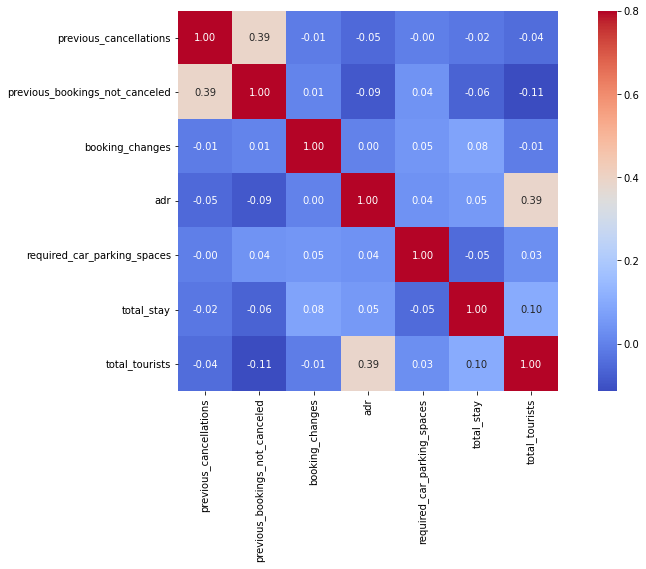

In [52]:
#corelation_matrix
relation_matrix= imp_data1.corr()
f, ax=plt.subplots(figsize=(14,7))
sns.heatmap(relation_matrix,annot = True,fmt='.2f', annot_kws={'size': 10},cmap='coolwarm', vmax=.8, square=True);

now lets see which agent made most number of bookings

In [53]:
a1 = pd.DataFrame(data1['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
a1.drop(a1[a1['agent'] == 0].index, inplace = True)                   #here 0 shows the agent has'nt made any bookings at all.
a1=a1[:5]              #selecting top 5 agents


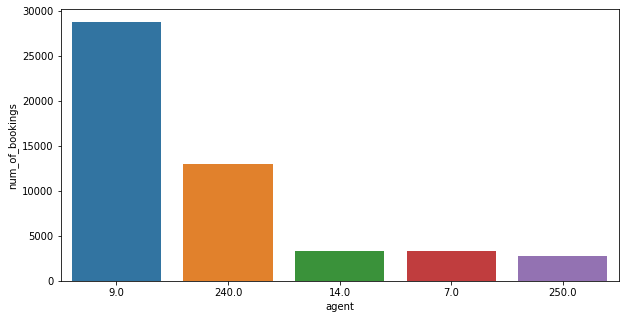

In [54]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = a1, order = a1.sort_values('num_of_bookings', ascending = False).agent)
#Agent no 9 has made most no of bookings

## q.) from which country most no of tourists are coming and plot top 5 countries from where tourists come

In [55]:
print('country with highest tourists is')
data['country'].value_counts().head(1)

country with highest tourists is


PRT    48590
Name: country, dtype: int64

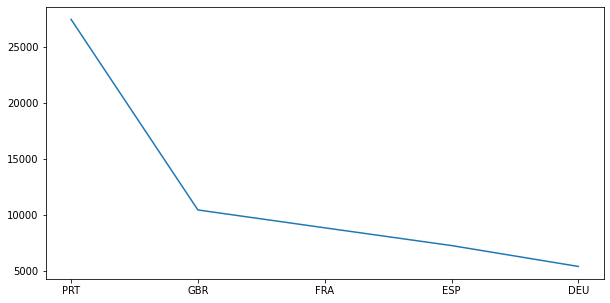

In [56]:
#From where most of the guest are comming
plt.figure(figsize = (10,5))
sns.lineplot (y= list(data1.country.value_counts().head (5)), x= list(data1.country.value_counts().head(5).index))


##what is the percentage of bookings in each hotel and year wise breakup of hotels

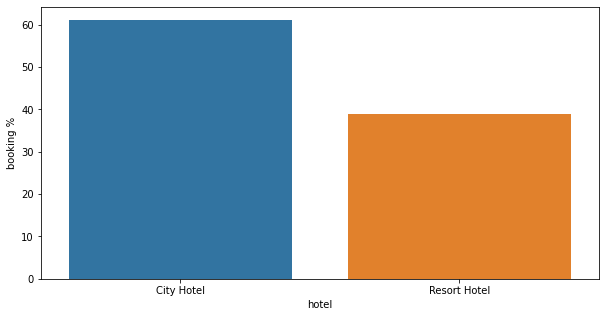

In [57]:
type_of_hotel= data1.groupby('hotel')
d1 = pd.DataFrame((type_of_hotel.size()/data1.shape[0])*100).reset_index().rename(columns = {0:'booking %'})
plt.figure(figsize = (10,5))
sns.barplot(x = d1['hotel'], y = d1['booking %'] )
plt.show()

city hotels have 60% occupancy and resort hotels have 40% occupancy

[Text(0.5, 1.0, 'Total tourists in both hotels per year')]

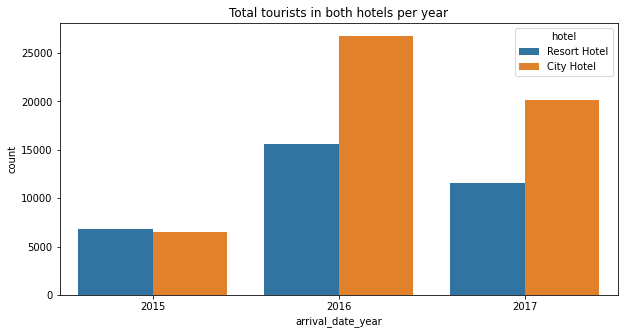

In [58]:
plt.figure(figsize=(10,5))
per_year = sns.countplot(x=data1['arrival_date_year'], hue = 'hotel', data = data1);
per_year.set(title = "Total tourists in both hotels per year")


In [59]:
## the different channels used by most tourists

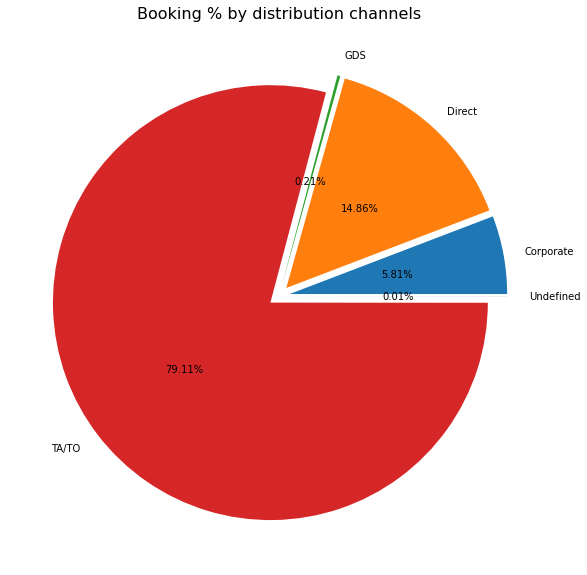

In [60]:
dist_c = data1.groupby('distribution_channel')
z1 = pd.DataFrame(round((dist_c.size()/data1.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})

plt.figure(figsize = (10,10))
data = z1['Booking_%']
labels = z1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Booking % by distribution channels", fontsize=16);

In [61]:
# how long customers stay in each hotel around the year

[Text(0.5, 1.0, 'Total Passengers booking of both hotels based on week')]

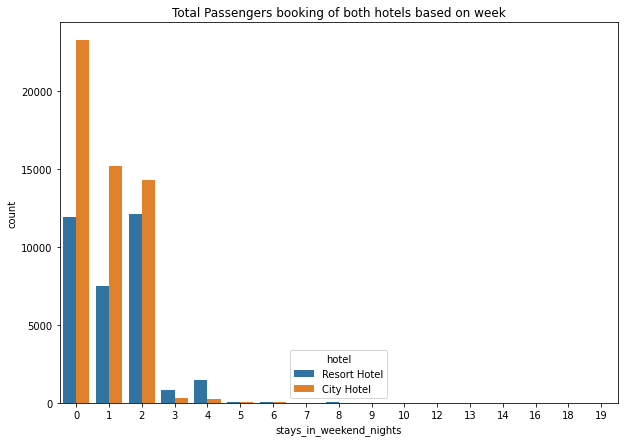

In [62]:
total_days=data1['stays_in_weekend_nights']+data1['stays_in_week_nights']

plt.figure(figsize=(10,7))
weekend=sns.countplot(x=data1['stays_in_weekend_nights'],hue='hotel',data=data1)
weekend.set(title = "Total Passengers booking of both hotels based on week")





*   on average most people stay less than 4 days
*   on average if stay is more than 3 days people chose resort






## the price adr(average daily rate).
1.how does it vary over different hotels.


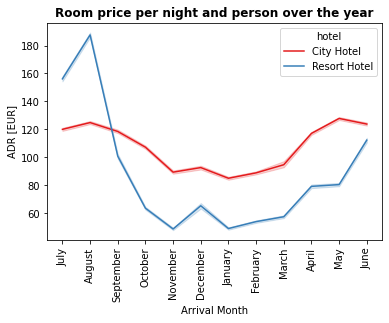

In [63]:
sns.lineplot(x = "arrival_date_month", y="adr", hue="hotel", data=data1, hue_order = ["City Hotel", "Resort Hotel"],palette= 'Set1')
plt.title("Room price per night and person over the year", weight = 'bold')
plt.xlabel("Arrival Month")
plt.xticks(rotation=90)
plt.ylabel("ADR [EUR]")
plt.show()

Q.)total number of bookings done through various types desposits 

In [64]:
data1['deposit_type'].value_counts(normalize=True)

No Deposit    0.986899
Non Refund    0.011877
Refundable    0.001224
Name: deposit_type, dtype: float64

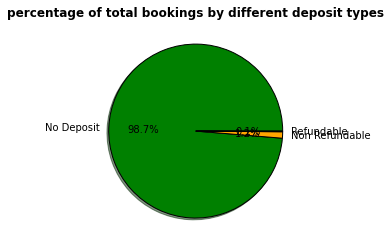

In [65]:
perctange_of_deposit_type = data1['deposit_type'].value_counts()
labels = ['No Deposit','Non Refundable','Refundable']
plt.title('percentage of total bookings by different deposit types',weight = 'bold')
cols = ['green','orange','red']
plt.pie(perctange_of_deposit_type,labels=labels,shadow = True, autopct = '%1.1f%%',wedgeprops= {'edgecolor':'black'},colors =cols)
plt.show()

##distribution of required car parking spaces

In [72]:
data1['required_car_parking_spaces'].value_counts()

0    79924
1     7273
2       28
3        3
8        2
Name: required_car_parking_spaces, dtype: int64

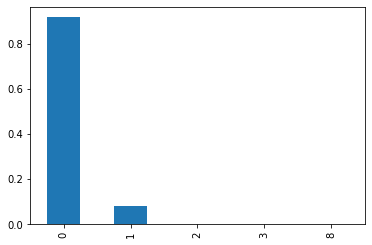

In [73]:
data1['required_car_parking_spaces'].value_counts(normalize = True ).plot.bar()